In [1]:
import pandas as pd

In [2]:
df_master = pd.read_csv("2-S1_enquete.csv")

In [3]:
df = df_master.copy()
df = df.dropna(subset=["回答"])

In [5]:
import MeCab
m = MeCab.Tagger ('-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')

def word_analysis(doc):
    node = m.parseToNode(doc)
    word_list=[]
    
    while node:
        hinshi = node.feature.split(",")[0]
        if (hinshi == "名詞"):
            word_list.append(node.feature.split(",")[6])
        node = node.next
        
    return word_list
    

In [6]:
df["名詞"] = df["回答"].apply(word_analysis) 

In [83]:
import itertools
import collections
words_pickup = df[df["性別"]=="男性"]["名詞"]
words = list(itertools.chain.from_iterable(words_pickup))
c = collections.Counter(words)


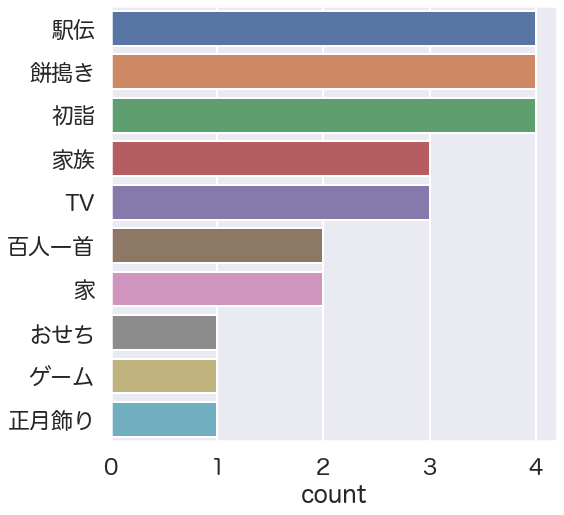

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="Hiragino Maru Gothic Pro",context="poster")
fig = plt.subplots(figsize=(8,8))
sns.countplot(y=words,order=[i[0] for i in c.most_common(10)])

In [74]:
c.most_common(10)

[('家族', 6),
 ('駅伝', 5),
 ('初詣', 5),
 ('家', 5),
 ('餅搗き', 4),
 ('TV', 4),
 ('作り', 3),
 ('お雑煮', 3),
 ('おせち', 2),
 ('百人一首', 2)]

In [77]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

['DejaVu Sans Mono', 'STIXNonUnicode', 'DejaVu Serif', 'STIXSizeTwoSym', 'cmmi10', 'STIXSizeOneSym', 'cmb10', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'STIXGeneral', 'DejaVu Sans', 'cmr10', 'STIXNonUnicode', 'DejaVu Serif', 'cmtt10', 'STIXGeneral', 'DejaVu Serif', 'cmss10', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Display', 'STIXSizeFourSym', 'DejaVu Sans', 'STIXSizeFiveSym', 'STIXSizeThreeSym', 'STIXNonUnicode', 'DejaVu Sans Mono', 'cmsy10', 'STIXSizeTwoSym', 'STIXNonUnicode', 'cmex10', 'STIXSizeFourSym', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Serif Display', 'DejaVu Sans', 'Avenir Next', 'Georgia', 'Wingdings 2', 'Sukhumvit Set', 'STIXGeneral', 'Arial', 'Marion', '.Keyboard', 'Noto Sans Gothic', 'Noto Sans Cuneiform', 'Trebuchet MS', 'Noto Sans Bamum', 'Times New Roman', 'STIXIntegralsD', 'KufiStandardGK', 'AppleGothic', 'Apple Braille', 'Avenir', 'Verdana', 'Hiragino Sans', 'Kannada MN', 'Mukta Mahee', 'Times New Roman', 'Gill Sans', 'Andale Mo